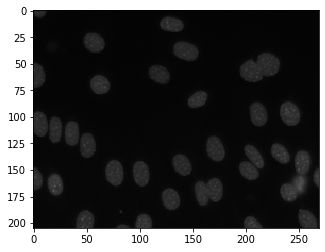

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2
from numpy.matrixlib.defmatrix import matrix
def imshow(im):
    plt.imshow(img,cmap='gray', vmin=0,vmax=255)
    plt.axis('off')
    return
img = cv2.imread("./images/Q6.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap='gray', vmin=0,vmax=255)


In [10]:

def getGaussianFilter(k, sigma):
    '''
    Step 1
    //Odd size filters only 
    '''
    shift = (k-1)//2
    filter1 = []
    for x in range(-shift, shift+1):
        row = []
        for y in range(-shift,shift+1):
            coeff = math.exp(-(x**2 + y**2)/sigma**2)
            row.append(coeff)
            #print(x-(k-shift), y-(k-shift), coeff)
        filter1.append(row)
    filter1 = np.array(filter1)
    return filter1/np.sum(filter1)

    


In [4]:

kernel1 = getGaussianFilter(3, 1)
kernel2 = getGaussianFilter(5,2)
kernel3 = getGaussianFilter(7,5)
print(kernel1)
print(kernel2)



[[0.04491922 0.12210311 0.04491922]
 [0.12210311 0.33191066 0.12210311]
 [0.04491922 0.12210311 0.04491922]]
[[0.01247764 0.02641517 0.03391775 0.02641517 0.01247764]
 [0.02641517 0.05592091 0.07180387 0.05592091 0.02641517]
 [0.03391775 0.07180387 0.09219799 0.07180387 0.03391775]
 [0.02641517 0.05592091 0.07180387 0.05592091 0.02641517]
 [0.01247764 0.02641517 0.03391775 0.02641517 0.01247764]]


In [5]:
def convolve(img, kern):
    kern = np.flip(kern, 0)
    kern = np.flip(kern,1)
    kernX = kern.shape[0]
    kernY = kern.shape[1]
    imgX = img.shape[0]
    imgY = img.shape[1]
    offset = (kernX-1)//2
    copy_img = np.zeros((imgX+(offset*2), imgY + (offset*2)))
    #print(copy_img.shape)
    #print(img.shape)
    copy_img[offset:imgX+offset,offset:imgY+offset] = img
    #print(copy_img)
    output_img = np.copy(img)
    for i in range(0,imgX):
        for j in range(0, imgY):
            vector = copy_img[i: i + kernX, j: j+kernY]
            output_img[i][j] = (vector.flatten() * kern.flatten()).sum()
   # print(kernX,kernY)
    return output_img




In [6]:
def getGradient(image):
    #Normalize Sobel
    Mx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])*(1/8)  
    My = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])*(1/8)  
    Gx = convolve(image, Mx)
    Gy = convolve(image, My)
    return np.sqrt(np.square(Gx) + np.square(Gy))


In [7]:
def getThreshold(g):
    iterations = 10
    tau_curr = np.mean(g,dtype=float)
    print(g.max())
    tau_prev = 0
    e = .1
    while (abs(tau_prev - tau_curr) > e):
        g_lower = g[g <=tau_curr]
        g_upper = g[g > tau_curr]
        tau_prev= tau_curr
        tau_curr = (g_lower.mean() + g_upper.mean())/2



    edges = (g >= tau_curr)
    edges = edges.astype(int)
    edges = edges*255
    return edges






In [11]:
plt.imshow(filtered_image,cmap='gray', vmin=0,vmax=255)


NameError: name 'filtered_image' is not defined

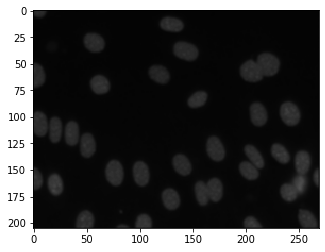

In [23]:

kernel = getGaussianFilter(3,2)
filtered_image = convolve(img,kernel)
g = getGradient(filtered_image)
plt.imshow(filtered_image,cmap='gray', vmin=0,vmax=255)


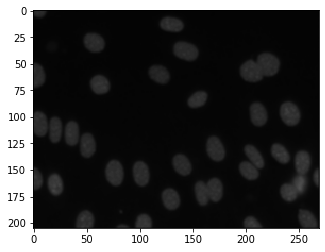

In [24]:
plt.imshow(filtered_image,cmap='gray', vmin=0,vmax=255)

15.81


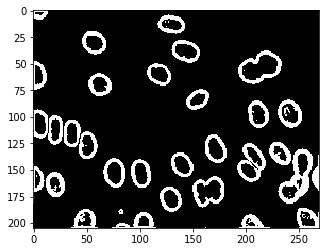

In [25]:
edges = getThreshold(g)
plt.imshow(edges,cmap='gray', vmin=0,vmax=255)
plt.savefig("binary.png")


In [30]:
g = getGradient(img)


[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]
[[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]


15.91


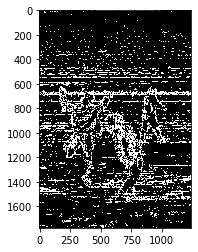

In [31]:
edges = getThreshold(g)
plt.imshow(edges,cmap='gray', vmin=0,vmax=255)